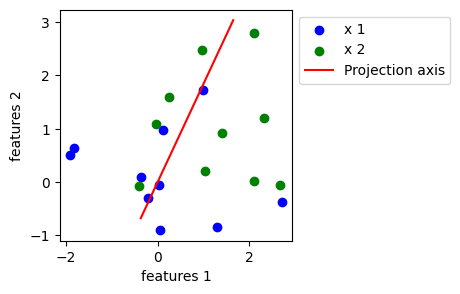

In [6]:
import numpy as np 
import matplotlib.pyplot as plt

# Create datasets which have two groups.

n1 = n2 = 10
x1 = np.random.randn(n1, 2) + np.array([0, 0])
x2 = np.random.randn(n2, 2) + np.array([1, 1])

# Calculate the mean of each group.

mean1 = np.mean(x1, axis=0)
mean2 = np.mean(x2, axis=0)

# Calculate the covariances of each group.

cov1 = np.cov(x1, rowvar=False)
cov2 = np.cov(x2, rowvar=False)

# Calculate covariance matrix within the group.

S = (cov1 * (n1-1) + cov2 * (n2-1) / (n1 + n2 -2))


# Calculate the weight vector.

w = np.linalg.inv(S).dot(mean1 - mean2)

# Plot the original data points.

plt.figure(figsize=(3, 3))
plt.scatter(x1[:, 0], x1[:, 1], c='b', label='x 1')
plt.scatter(x2[:, 0], x2[:, 1], c='g', label='x 2')

# Calculate the endpoint of projection axis.

axis_start = np.min(np.vstack([x1.dot(w), x2.dot(w)])) * w / np.dot(w, w)
axis_end = np.max(np.vstack([x1.dot(w), x2.dot(w)])) * w / np.dot(w, w)

# Plot the projection axis.

plt.plot([axis_start[0], axis_end[0]], [axis_start[1], axis_end[1]], 'r-', label='Projection axis')
plt.xlabel('features 1')
plt.ylabel('features 2')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

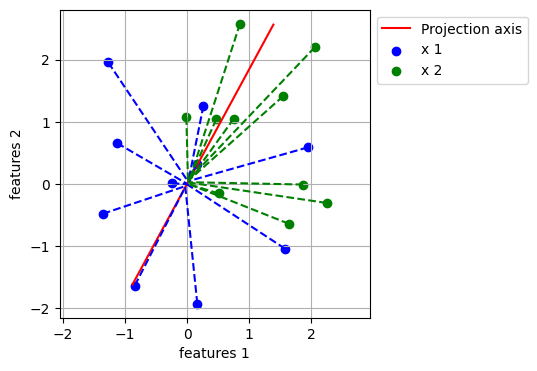

In [15]:
# Create datasets which have two groups.

n1 = n2 = 10
x1 = np.random.randn(n1, 2) + np.array([0, 0])
x2 = np.random.randn(n2, 2) + np.array([1, 1])

# Projecting the data points.

y1 = x1.dot(w)
y2 = x2.dot(w)

# Calculate the endpoint in the projection axis.

axis_start = np.min(np.vstack([x1.dot(w), x2.dot(w)])) * w / np.dot(w, w)
axis_end = np.max(np.vstack([x1.dot(w), x2.dot(w)])) * w / np.dot(w, w)

# Plot the projection axis.

plt.figure(figsize=(4, 4))
plt.plot([axis_start[0], axis_end[0]], [axis_start[1], axis_end[1]], 'r-', label='Projection axis')

# Plot the original data points.

plt.scatter(x1[:, 0], x1[:, 1], c='b', label='x 1')
plt.scatter(x2[:, 0], x2[:, 1], c='g', label='x 2')

# Plot the projected data points
for xx, yy in zip(x1, y1):
    plt.plot([xx[0], w[0]*yy], [xx[1], w[1]*yy], 'b--')
    
for xx, yy in zip(x2, y2):
    plt.plot([xx[0], w[0]*yy], [xx[1], w[1]*yy], 'g--')

plt.axis('equal')
plt.grid(True)
plt.xlabel('features 1')
plt.ylabel('features 2')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()    

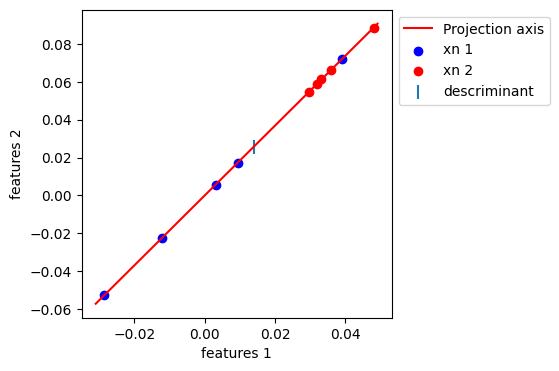

In [20]:
nn1 = nn2 =5
xn1 = np.random.randn(nn1, 2) + np.array([0, 0])
xn2 = np.random.randn(nn2, 2) + np.array([1, 1])

# Project the data points.

yn1 = xn1.dot(w)
yn2 = xn2.dot(w)

# Calculate the endpoint in the projection axis.

axis_start = np.min(np.r_[y1, y2, yn1, yn2]) * w
axis_end = np.max(np.r_[y1, y2, yn1, yn2]) * w

# Plot the projection axis.

plt.figure(figsize=(4, 4))
plt.plot([axis_start[0], axis_end[0]], [axis_start[1], axis_end[1]], 'r-', label='Projection axis')

# Plot the projected data points.
plt.scatter(yn1*w[0], yn1*w[1], c='b', label='xn 1')
plt.scatter(yn2*w[0], yn2*w[1], c='r', label='xn 2')
plt.scatter((mean1.dot(w)*w[0]+mean2.dot(w)*w[0])/2, (mean1.dot(w)*w[1]+mean2.dot(w)*w[1])/2\
    , marker='|', s=100, label='descriminant')
plt.xlabel('features 1')
plt.ylabel('features 2')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

D_1^2-D_2^2:                   -43.534432756349474
classification:                Group 2
fisher discriminant analysis:  -43.534432756349474


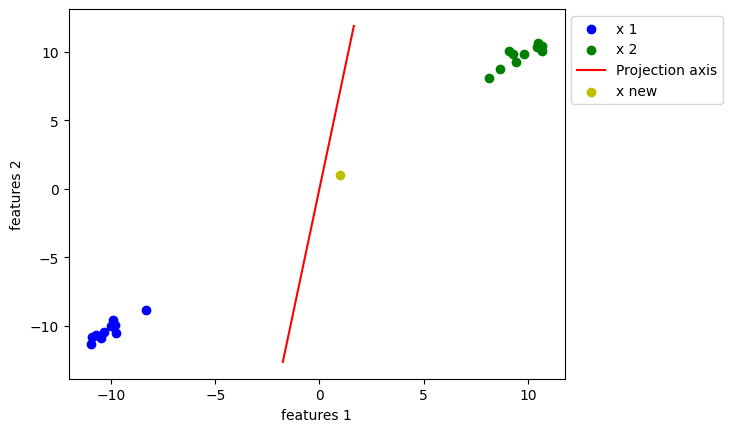

In [26]:
# Step 1: Generate random data for two groups

mean1 = [-10, -10]
cov1 = [[1, 0.9], [0.9, 1]]
x1 = np.random.multivariate_normal(mean1, cov1, 10)

mean2 = [10, 10]
cov2 = [[1, 0.9], [0.9, 1]]
x2 = np.random.multivariate_normal(mean2, cov2, 10)

plt.scatter(x1[:, 0], x1[:, 1], c='b', label='x 1')
plt.scatter(x2[:, 0], x2[:, 1], c='g', label='x 2')

# Calculate the mean in each group.

mean_x1 = np.mean(x1, axis=0)
mean_x2 = np.mean(x2, axis=0)

# Calculate the covariances in each group.
cov_x1= np.cov(x1, rowvar=False)
cov_x2 = np.cov(x2, rowvar=False)

# Calculate covariance matrix in the group.
S= cov_x1*(len(x1)-1) + cov_x2*(len(x2)-1)
S = S / (len(x1) + len(x2) - 2)

w = np.linalg.inv(S).dot(mean_x1 - mean_x2)

# 射影軸の端点を計算
axis_start = np.min(np.vstack([x1.dot(w), x2.dot(w)])) * w / np.dot(w, w) 
axis_end = np.max(np.vstack([x1.dot(w), x2.dot(w)])) * w / np.dot(w, w) 
# 射影軸をプロット
plt.plot([axis_start[0], axis_end[0]], [axis_start[1], axis_end[1]]\
         , 'r-', label='Projection axis')
plt.xlabel('features 1')
plt.ylabel('features 2')

# Step 3: Generate a new sample data point
new_x = np.array([1, 1])
plt.scatter(new_x[0], new_x[1], c='y', label='x new')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Step 4: Calculate Mahalanobis distance for both groups
D_2_2=(new_x-mean_x2).T.dot(np.linalg.inv(S)).dot(new_x-mean_x2)
D_1_2=(new_x-mean_x1).T.dot(np.linalg.inv(S)).dot(new_x-mean_x1)
# Step 5: Classify the new sample based on Mahalanobis distances
classification = "Group 1" if D_1_2 < D_2_2 else "Group 2"

f=w.T.dot(new_x)-1/2*((mean_x1-mean_x2).T).dot(np.linalg.inv(S).dot(mean_x1+mean_x2))
print('D_1^2-D_2^2:                  ',(D_2_2-D_1_2)/2)
print('classification:               ',classification)
print('fisher discriminant analysis: ',f)
